In [29]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt


In [23]:
# b. Load training and testing data
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# # Now, import keras and load your data
# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10

# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Dataset loaded successfully!")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Dataset loaded successfully!
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [24]:
# Normalize pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [25]:
# c. Define the network architecture using Keras
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # flatten image
    Dense(256, activation='relu'),     # hidden layer
    Dense(128, activation='relu'),     # hidden layer
    Dense(10, activation='softmax')    # output layer (10 classes)
])


In [36]:
# Using Adam optimizer
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [35]:
# d. Train the model using Adam optimizer
history = model.fit(x_train, y_train,
                    epochs=2,
                    validation_data=(x_test, y_test))


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3178 - loss: 1.8456 - val_accuracy: 0.3253 - val_loss: 1.8293
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3288 - loss: 1.8273 - val_accuracy: 0.3345 - val_loss: 1.8137


In [21]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4299 - loss: 1.5825
Test Loss: 1.5825330018997192
Test Accuracy: 0.42989999055862427


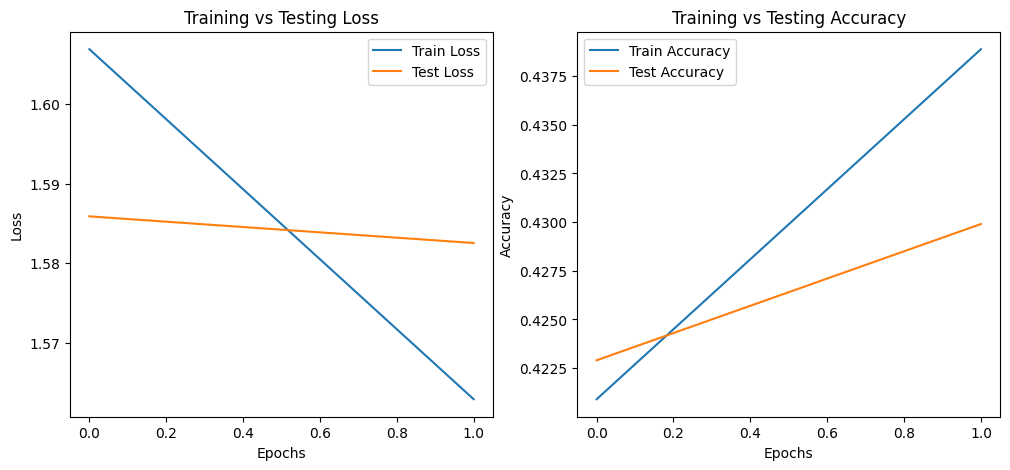

In [22]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Training vs Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Training vs Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
